Kelompok 5 PYTN-KS08

**Muhammad Ismail** - **PYTN-KS08-011**

**Syahrani Nabilla Kharisma H** - **PYTN-KS08-013**

**Shendy Krisyohanda** - **PYTN-KS08-021**


# Pengenalan

Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user


# Import Library

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from google.colab import files

# Data Loading

In [ ]:
!pip install kaggle
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mail2418","key":"784e529f058f35edd5174910c6d63425"}'}

In [ ]:
# membuat directory dari kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d arjunbhasin2013/ccdata

100% 340k/340k [00:00<00:00, 699kB/s]
100% 340k/340k [00:00<00:00, 698kB/s]


In [ ]:
# unzip dan lihat list dataset
!mkdir ccdata
!unzip ccdata.zip -d ccdata

Archive:  ccdata.zip
  inflating: ccdata/CC GENERAL.csv   


In [ ]:
df = pd.read_csv('/content/ccdata/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Melihat Informasi dari dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Melihat Deskripsi dari dataset

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Melihat jumlah null values pada dataset

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Melihat dimensi dari dataset

In [ ]:
df.shape

(8950, 18)

# Data Cleaning

In [ ]:
new_df = df.copy()
imputer = SimpleImputer()
new_df['MINIMUM_PAYMENTS'] = imputer.fit_transform(new_df['MINIMUM_PAYMENTS'].values.reshape(-1,1))
new_df.dropna(inplace=True)
new_df = new_df.drop(columns=['CUST_ID'])
new_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# EDA

In [ ]:
new_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Correlation Diagram

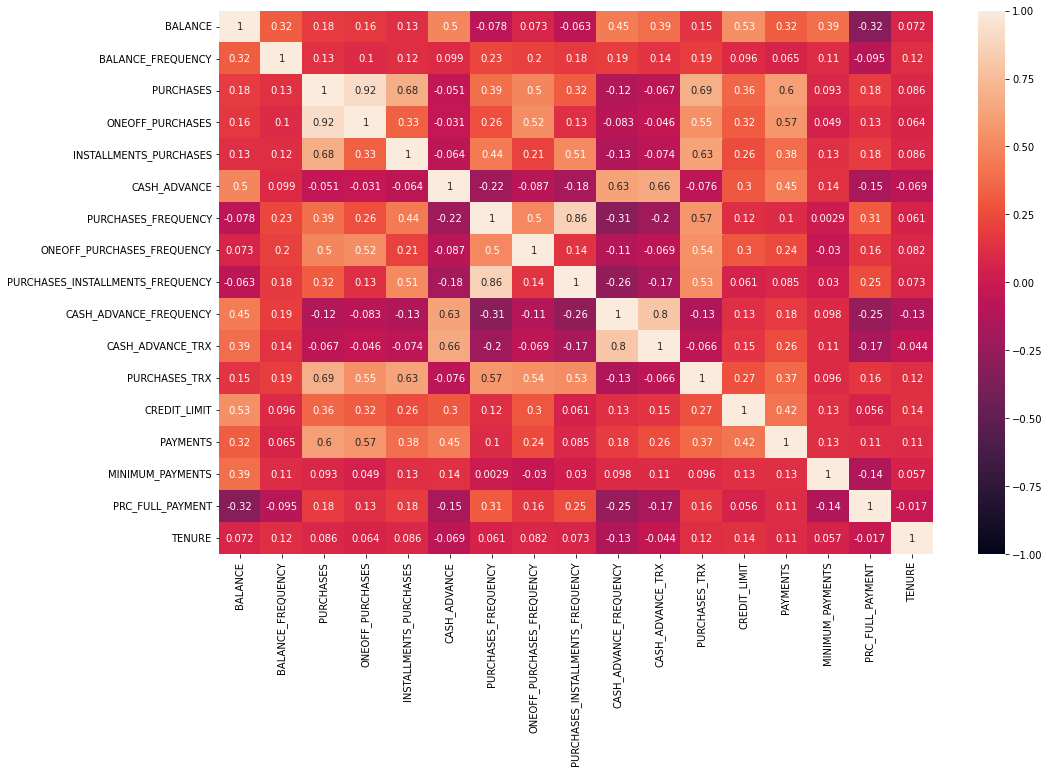

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True)

## Scatter Plot diagram

Text(0.5, 1.0, 'Relation between Purchases and Oneoff_purchases')

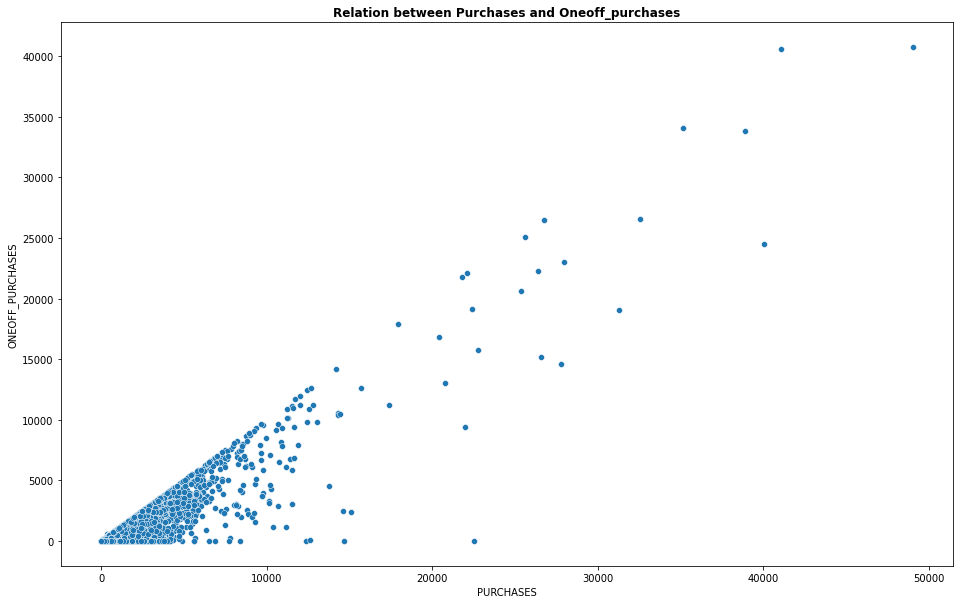

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=new_df, x='PURCHASES', y='ONEOFF_PURCHASES')
plt.title('Relation between Purchases and Oneoff_purchases', fontsize=12, fontweight='bold')

# Data Preprocessing

In [ ]:
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df)
new_df_scaled = pd.DataFrame(new_df_scaled, columns=new_df.columns)
new_df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.346930,0.329128,-4.126919


# Pendefinisian Model

## K-Means

In [ ]:
# Mencari nilai inersia di setiap cluster
wcss = []
metrics_score_kmeans = []
for i in range(2,5):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(new_df_scaled)
    score = silhouette_score(new_df_scaled, kmeans.fit_predict(new_df_scaled))
    metrics_score_kmeans.append(score)
    wcss.append(kmeans.inertia_)
wcss

[127772.91229877873, 111976.00018209251, 99065.82208709329]

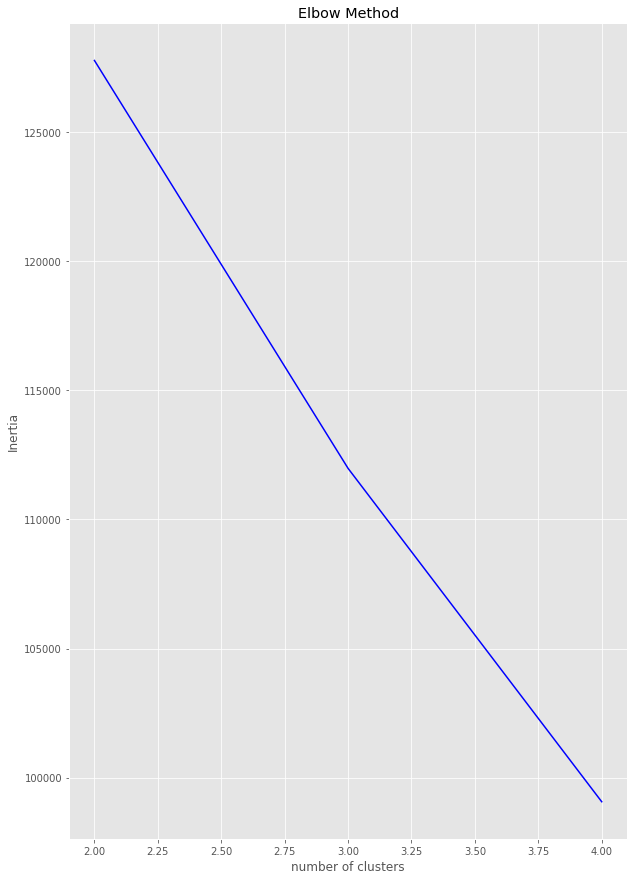

In [ ]:
# Menggunakan Elbow Method untuk mencari banyaknya cluster yang optimal
plt.figure(figsize=(10,15))
plt.style.use('ggplot')
plt.plot(range(2,5), wcss, linewidth=1.5, color="blue")
plt.xlabel("number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

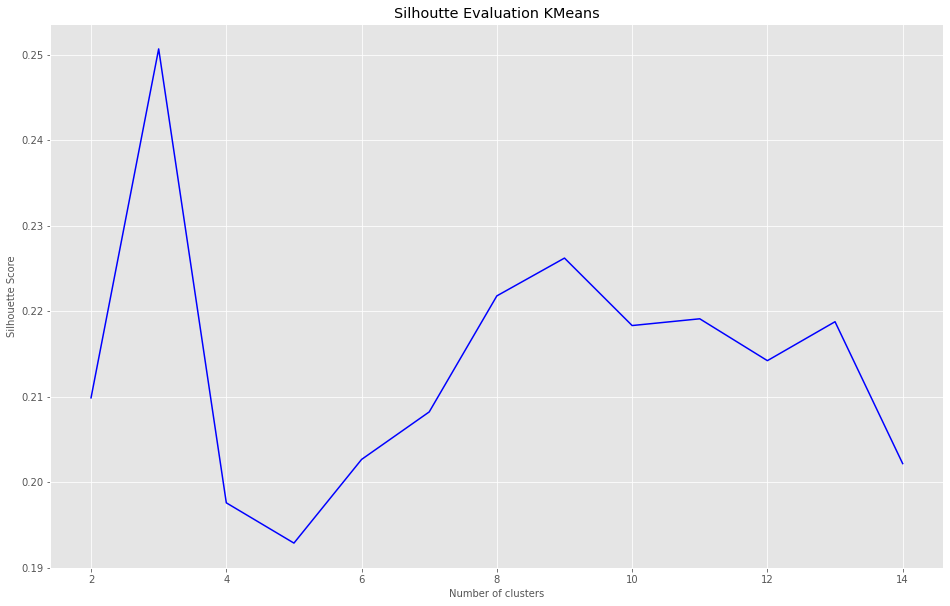

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_kmeans, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation KMeans")
plt.show() 

Diambil sebanyak 3 kluster karena apabila melebihi 3 kluster, terjadi penurunan silhoutte scores 

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans.fit(new_df_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
labels_kmeans = kmeans.labels_
cluster_kmeans = pd.DataFrame({'cluster':labels_kmeans})
kmeans_cluster_dataset = pd.concat([new_df_scaled,cluster_kmeans], axis=1)

In [ ]:
kmeans_cluster_dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541,2
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541,1
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541,2
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541,2
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919,2
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919,2
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919,2
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.346930,0.329128,-4.126919,2


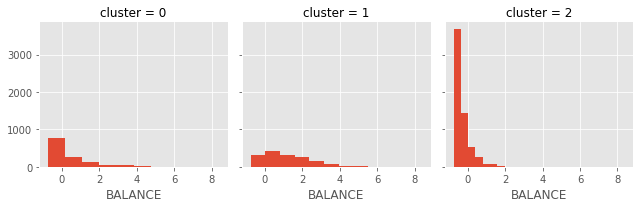

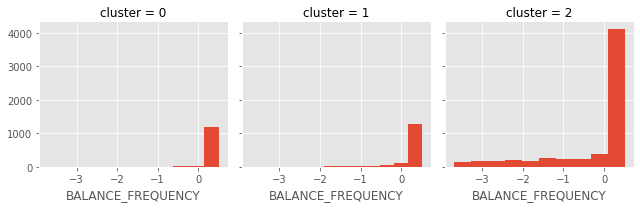

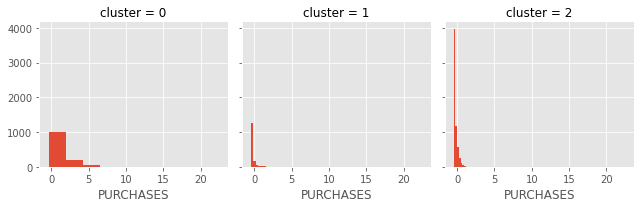

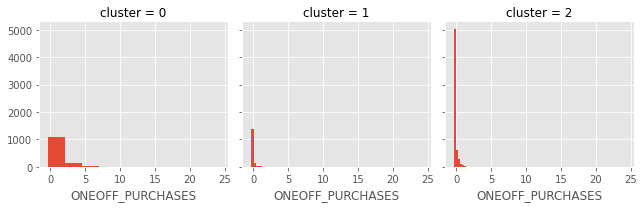

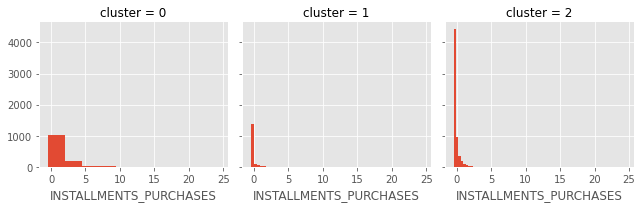

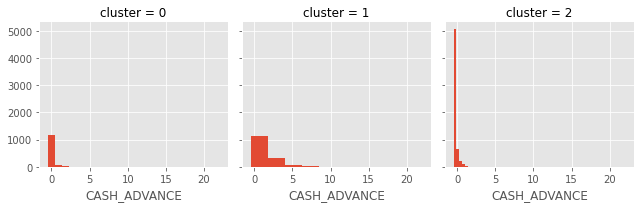

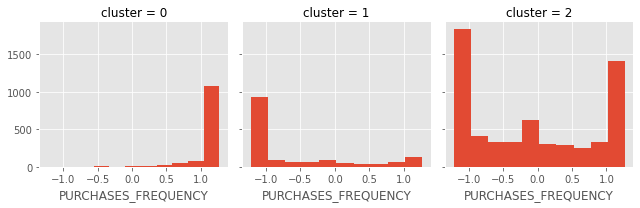

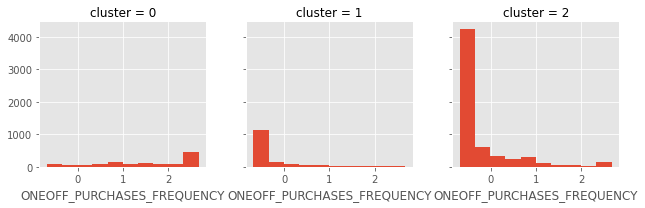

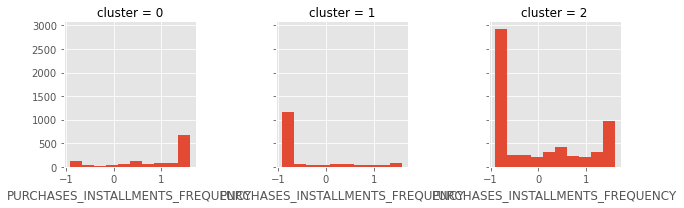

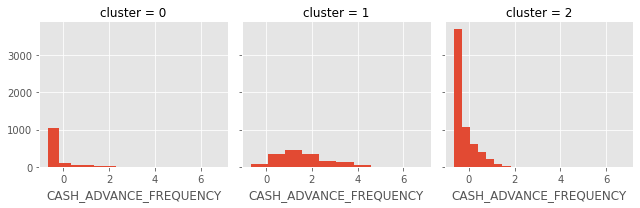

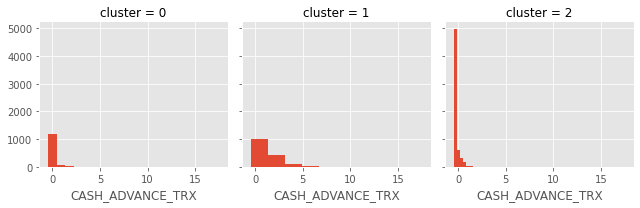

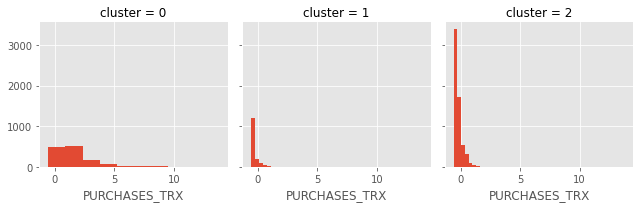

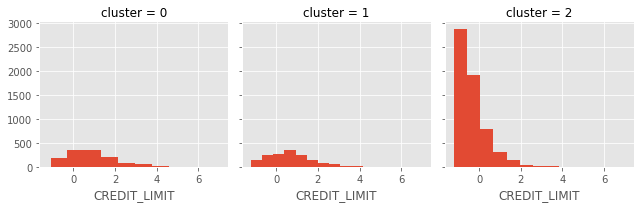

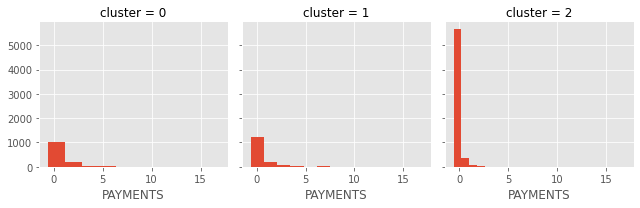

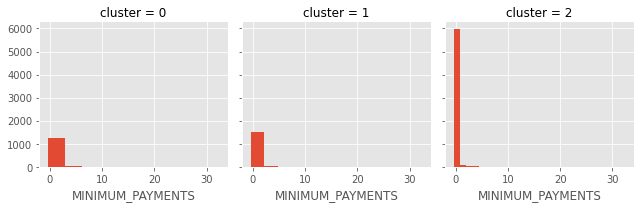

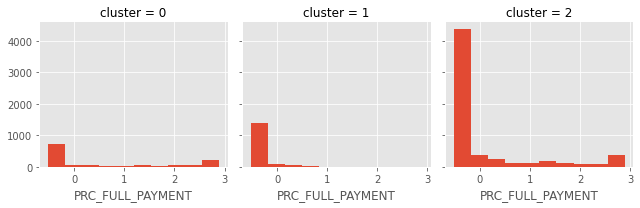

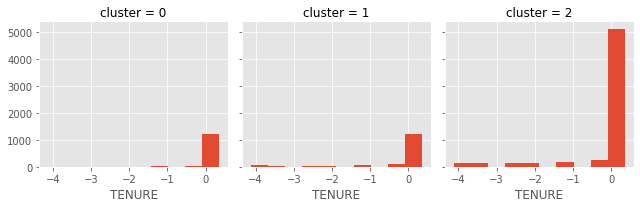

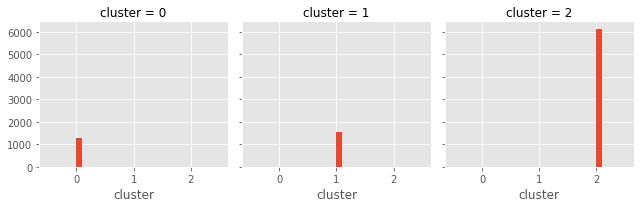

In [ ]:
for i in kmeans_cluster_dataset:
    grid = sns.FacetGrid(kmeans_cluster_dataset, col='cluster')
    grid.map(plt.hist, i)

## Complete Link

In [ ]:
# Mencari nilai inersia di setiap cluster
metrics_score_complete = []
for i in range(2,5):
    agglo_complete = AgglomerativeClustering(n_clusters=i, linkage="complete")
    agglo_complete.fit(new_df_scaled)
    score = silhouette_score(new_df_scaled, agglo_complete.fit_predict(new_df_scaled))
    metrics_score_complete.append(score)
metrics_score_complete

[0.7865446389503584, 0.7862981563582961, 0.7792493747692626]

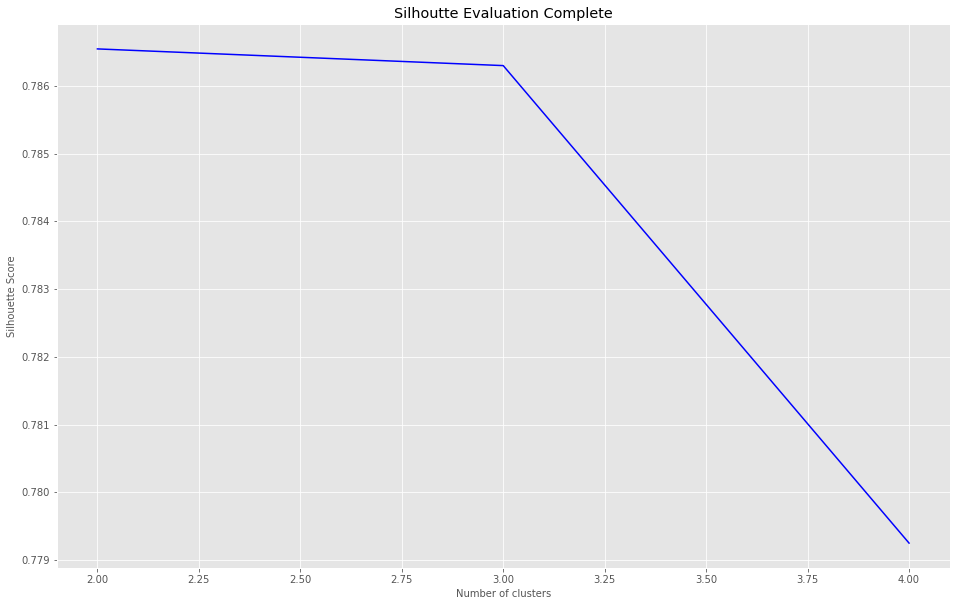

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_complete, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation Complete")
plt.show() 

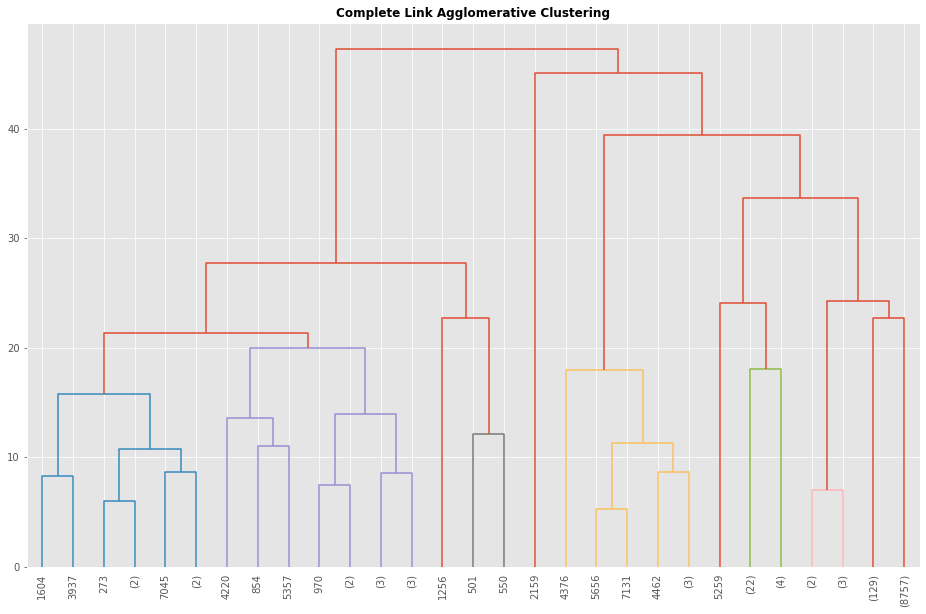

In [ ]:
plt.figure(figsize=(16,10))
plt.title('Complete Link Agglomerative Clustering', fontsize=12, fontweight='bold')
dendrogram(linkage(new_df_scaled,method="complete"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.show()

In [ ]:
agglo_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
agglo_complete.fit(new_df_scaled)
labels_complete = agglo_complete.labels_

In [ ]:
cluster_complete = pd.DataFrame({'cluster':labels_complete})
complete_cluster_dataset = pd.concat([new_df_scaled,cluster_complete], axis=1)
complete_cluster_dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919,0
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919,0
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919,0
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.346930,0.329128,-4.126919,0


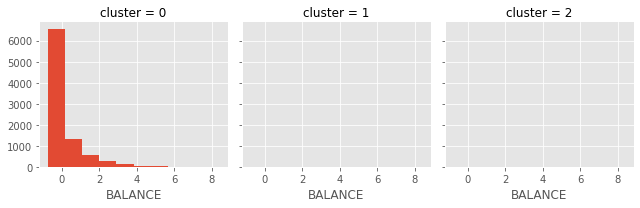

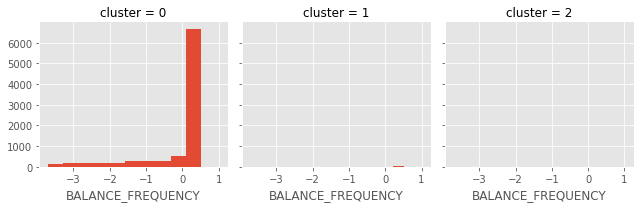

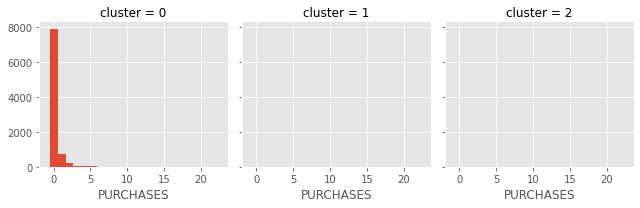

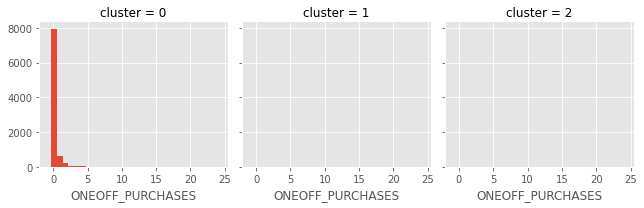

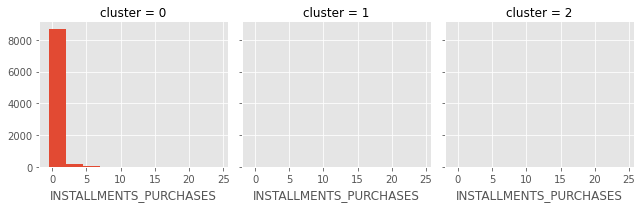

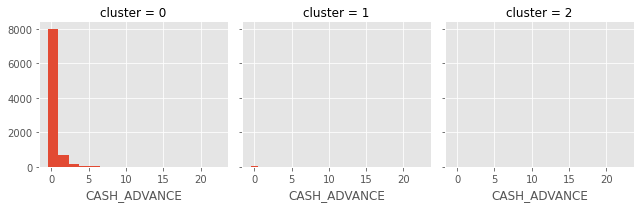

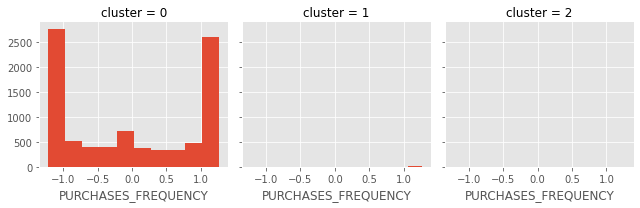

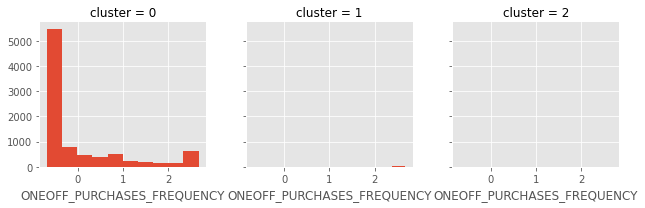

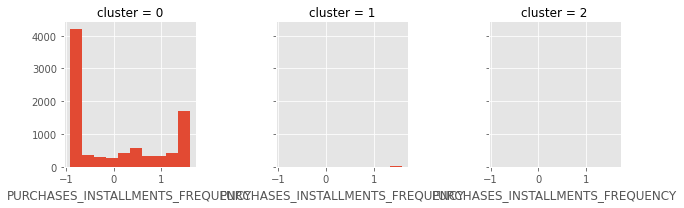

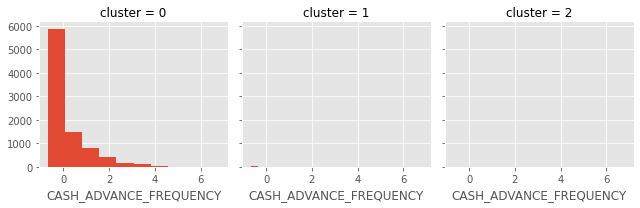

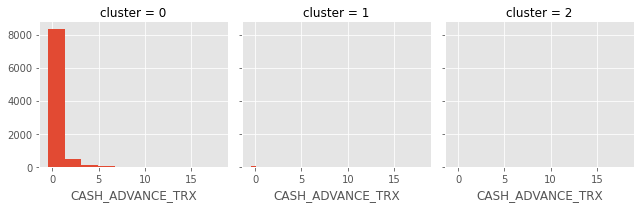

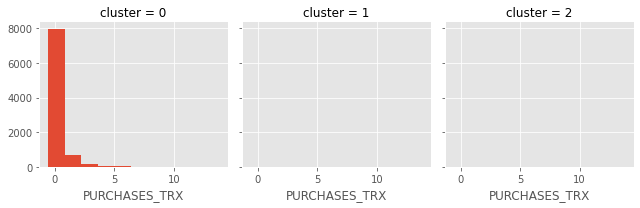

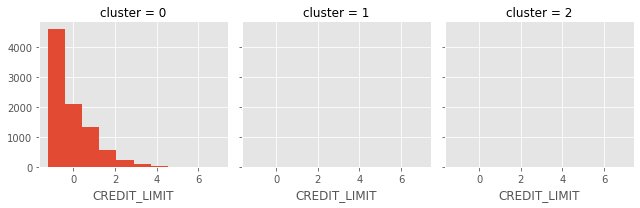

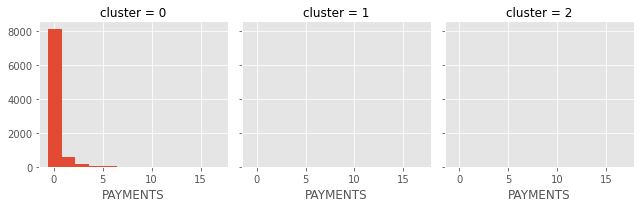

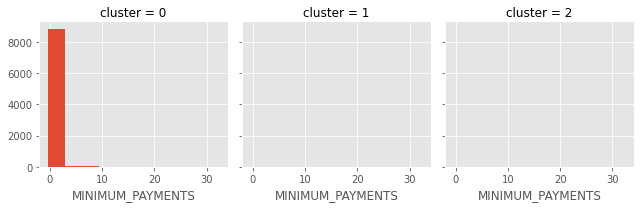

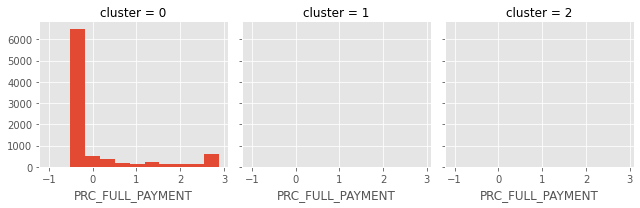

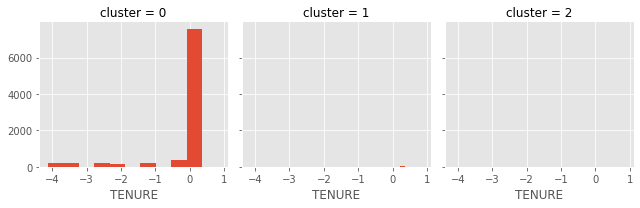

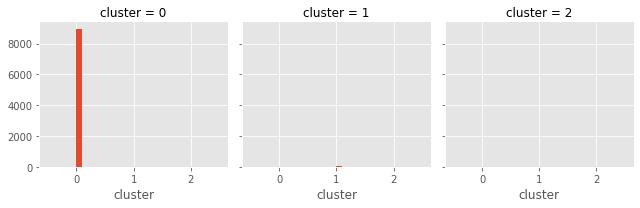

In [ ]:
for i in complete_cluster_dataset:
    grid = sns.FacetGrid(complete_cluster_dataset, col='cluster')
    grid.map(plt.hist, i)

## Single Link

In [ ]:
# Mencari nilai inersia di setiap cluster
metrics_score_single = []
for i in range(2,5):
    agglo_single = AgglomerativeClustering(n_clusters=i, linkage="single")
    agglo_single.fit(new_df_scaled)
    score = silhouette_score(new_df_scaled, agglo_single.fit_predict(new_df_scaled))
    metrics_score_single.append(score)
metrics_score_single

[0.8408048282217698, 0.8379826872256295, 0.8121063507615278]

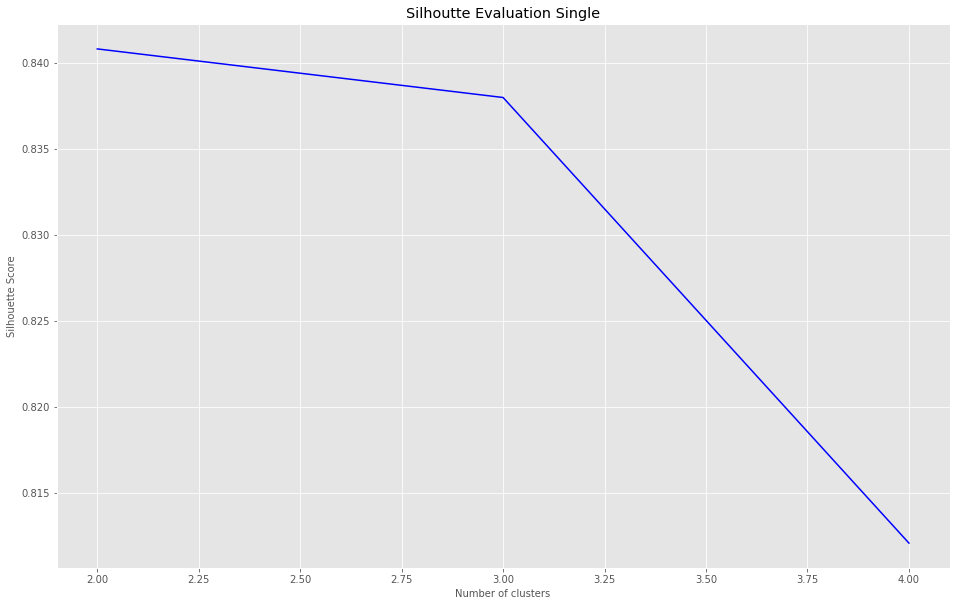

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_single, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation Single")
plt.show() 

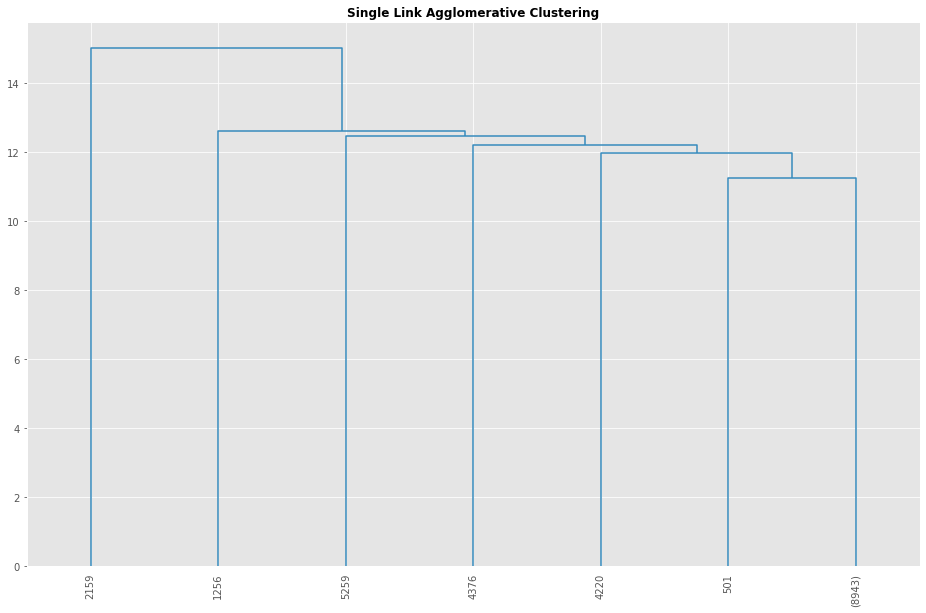

In [ ]:
plt.figure(figsize=(16,10))
plt.title('Single Link Agglomerative Clustering', fontsize=12, fontweight='bold')
dendrogram(linkage(new_df_scaled,method="single"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.show()

In [ ]:
agglo_single = AgglomerativeClustering(n_clusters=2, linkage="single")
agglo_single.fit(new_df_scaled)
labels_single = agglo_single.labels_

In [ ]:
cluster_single = pd.DataFrame({'cluster':labels_single})
single_cluster_dataset = pd.concat([new_df_scaled,cluster_single], axis=1)
single_cluster_dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919,0
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919,0
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919,0
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.346930,0.329128,-4.126919,0


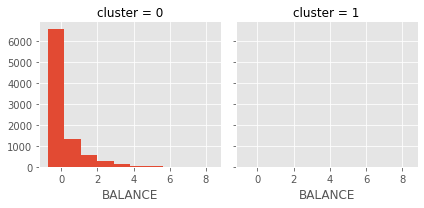

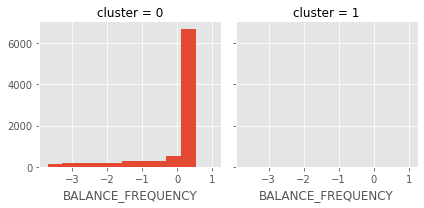

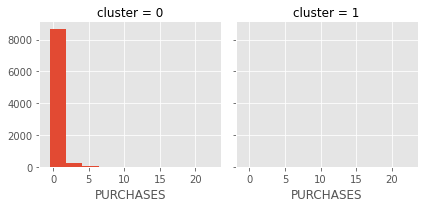

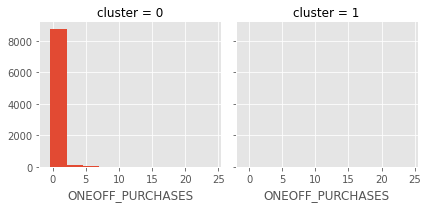

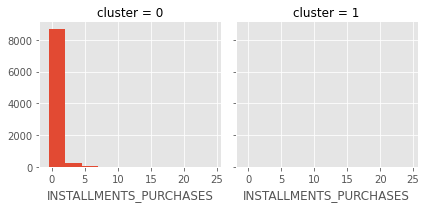

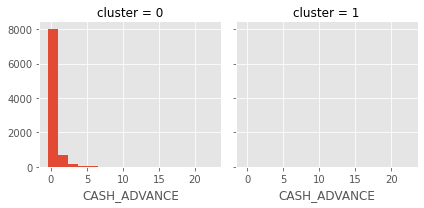

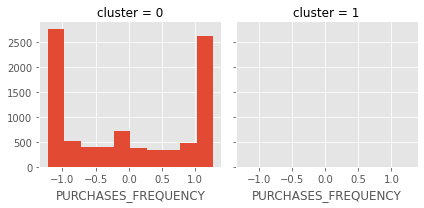

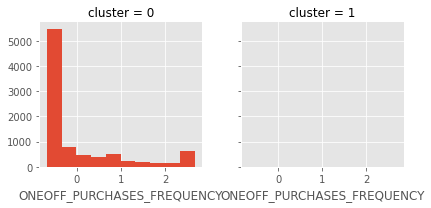

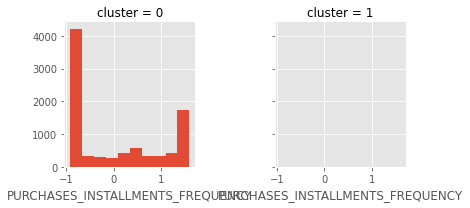

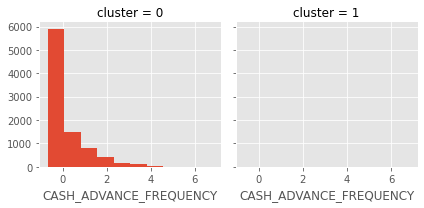

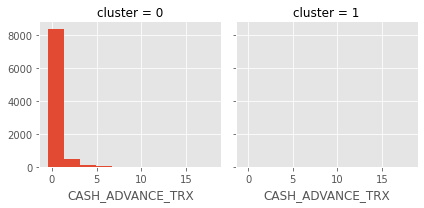

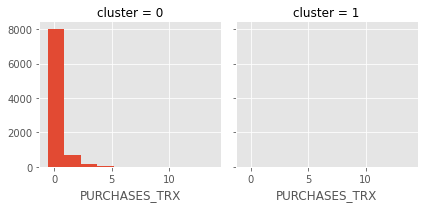

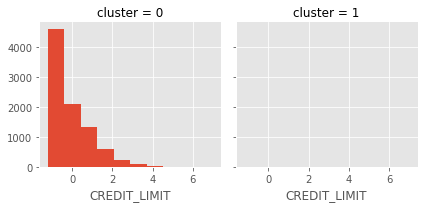

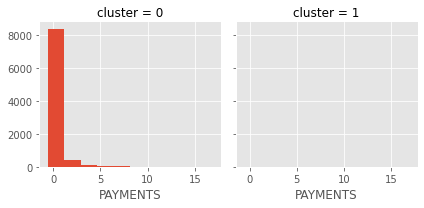

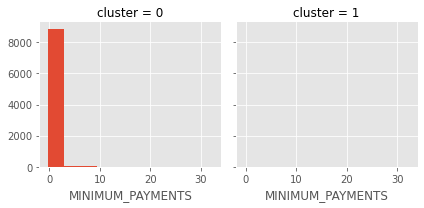

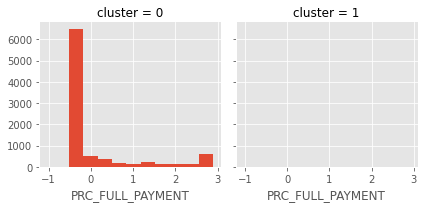

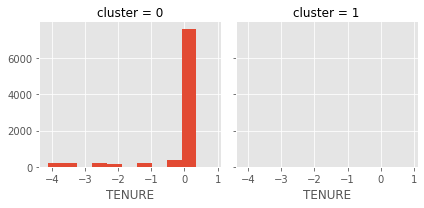

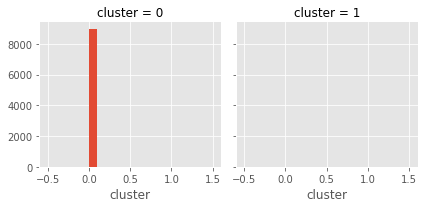

In [ ]:
for i in single_cluster_dataset:
    grid = sns.FacetGrid(single_cluster_dataset, col='cluster')
    grid.map(plt.hist, i)

## Average Link

In [ ]:
# Mencari nilai inersia di setiap cluster
metrics_score_average = []
for i in range(2,5):
    agglo_average = AgglomerativeClustering(n_clusters=i, linkage="average")
    agglo_average.fit(new_df_scaled)
    score = silhouette_score(new_df_scaled, agglo_average.fit_predict(new_df_scaled))
    metrics_score_average.append(score)
metrics_score_average

[0.8496907163747636, 0.839120046932041, 0.8129521441858722]

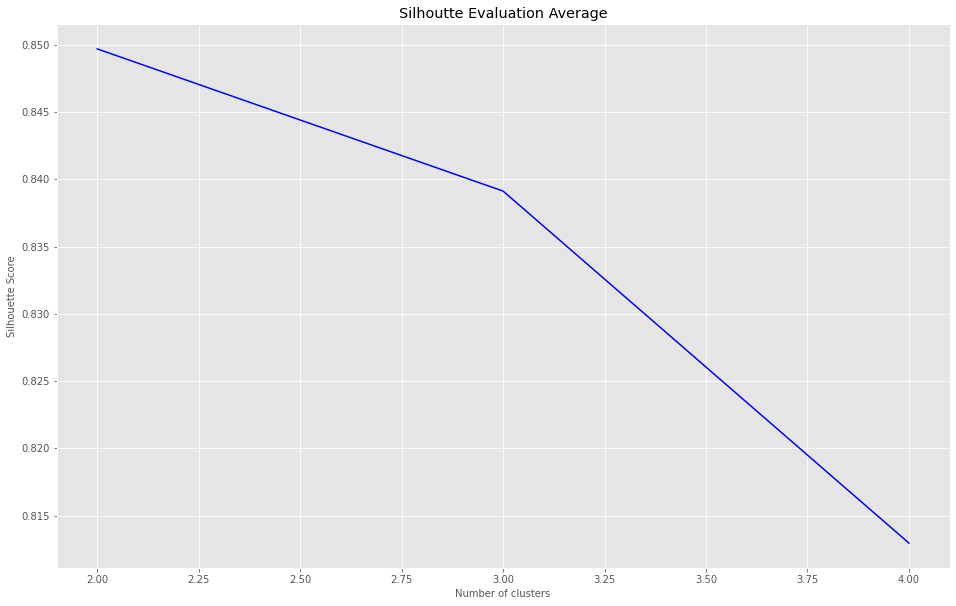

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_average, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation Average")
plt.show() 

In [ ]:
plt.figure(figsize=(16,10))
plt.title('Average Link Agglomerative Clustering', fontsize=12, fontweight='bold')
dendrogram(linkage(new_df_scaled,method="average"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.show()

In [ ]:
agglo_average = AgglomerativeClustering(n_clusters=2, linkage="average")
agglo_average.fit(new_df_scaled)
labels_average = agglo_average.labels_

In [ ]:
cluster_average = pd.DataFrame({'cluster':labels_average})
average_cluster_dataset = pd.concat([new_df_scaled,cluster_average], axis=1)
average_cluster_dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919,0
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919,0
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919,0
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.346930,0.329128,-4.126919,0


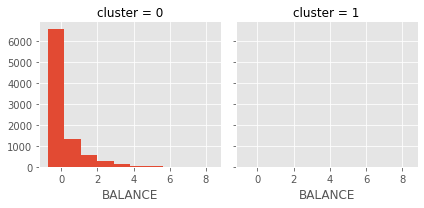

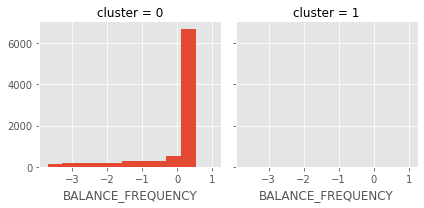

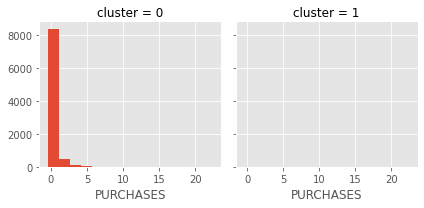

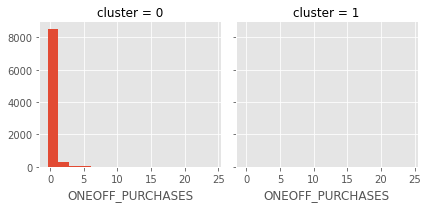

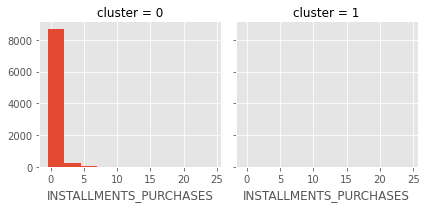

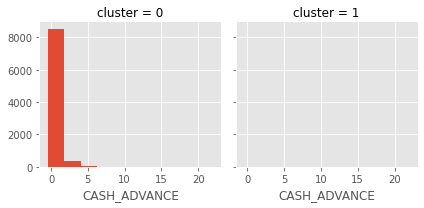

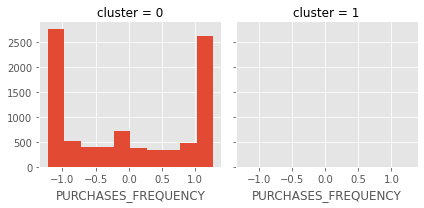

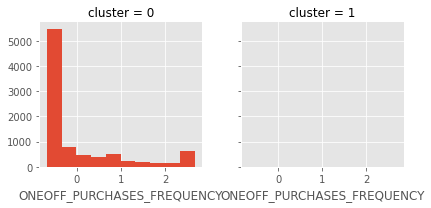

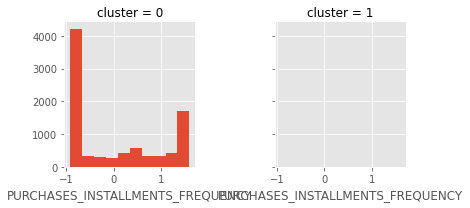

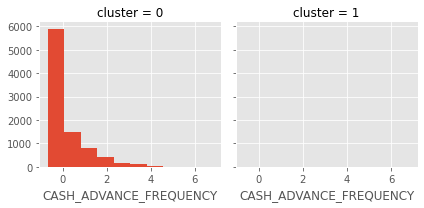

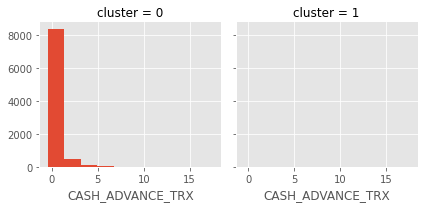

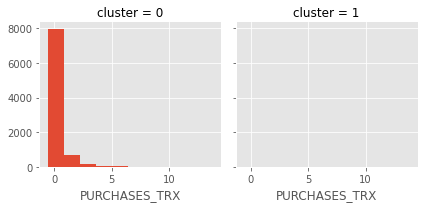

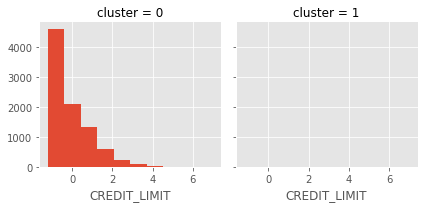

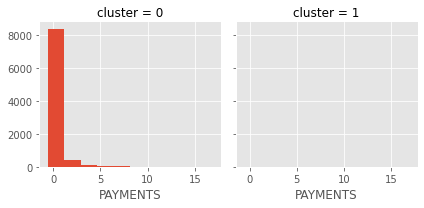

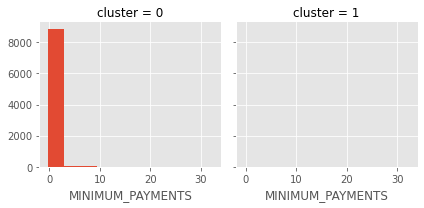

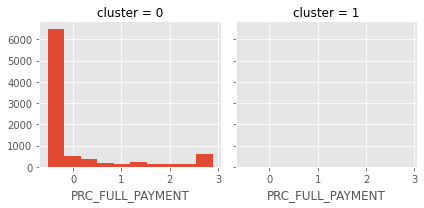

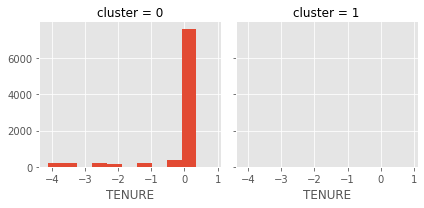

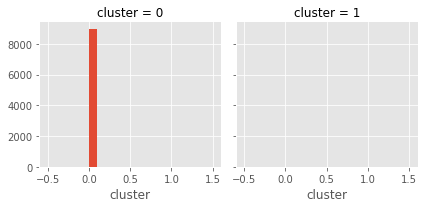

In [ ]:
for i in average_cluster_dataset:
    grid = sns.FacetGrid(average_cluster_dataset, col='cluster')
    grid.map(plt.hist, i)

## Ward Link

In [ ]:
# Mencari nilai inersia di setiap cluster
metrics_score_ward = []
for i in range(2,5):
    agglo_ward = AgglomerativeClustering(n_clusters=i)
    agglo_ward.fit(new_df_scaled)
    score = silhouette_score(new_df_scaled, agglo_ward.fit_predict(new_df_scaled))
    metrics_score_ward.append(score)
metrics_score_ward

[0.18946427598983895, 0.18160640105118006, 0.18238091696618172]

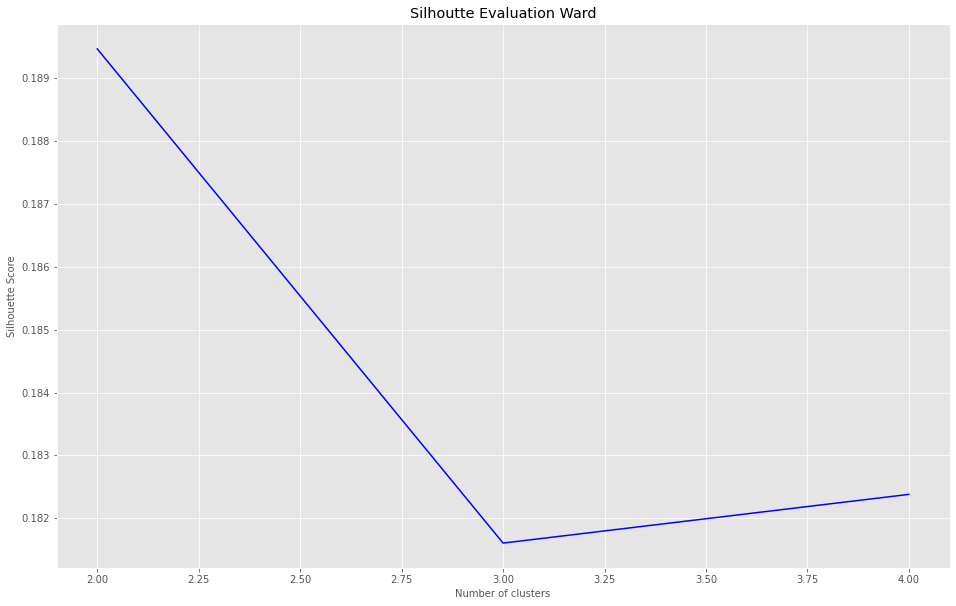

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_ward, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation Ward")
plt.show() 

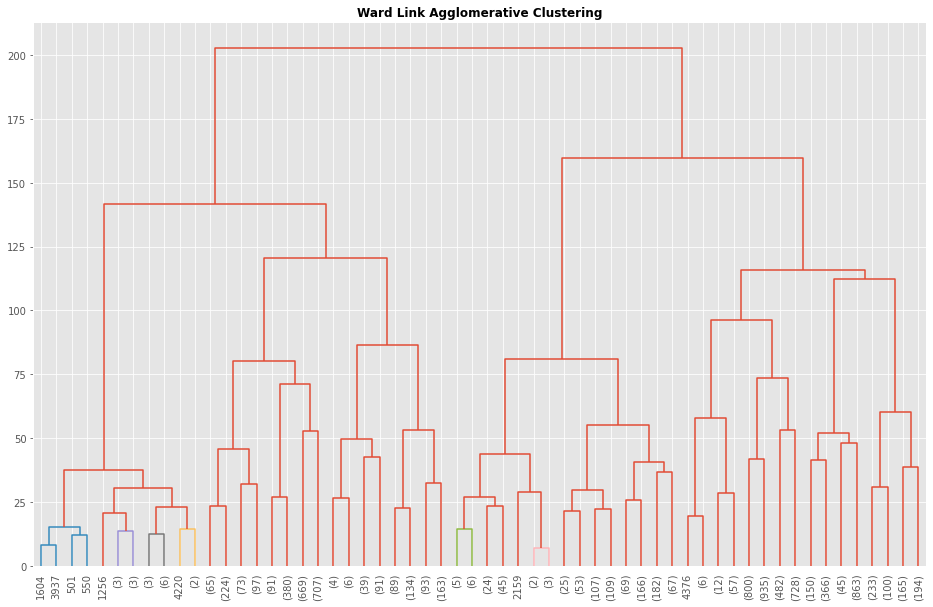

In [ ]:
plt.figure(figsize=(16,10))
plt.title('Ward Link Agglomerative Clustering', fontsize=12, fontweight='bold')
dendrogram(linkage(new_df_scaled,method="ward"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.show()

In [ ]:
agglo_ward = AgglomerativeClustering(n_clusters=2)
agglo_ward.fit(new_df_scaled)
labels_ward = agglo_ward.labels_

In [ ]:
cluster_ward = pd.DataFrame({'cluster':labels_ward})
ward_cluster_dataset = pd.concat([new_df_scaled,cluster_ward], axis=1)
ward_cluster_dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919,0
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919,0
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919,0
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.346930,0.329128,-4.126919,0


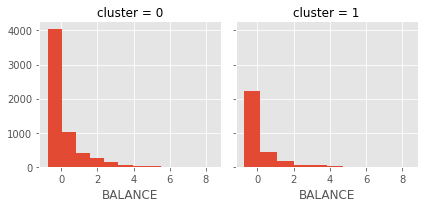

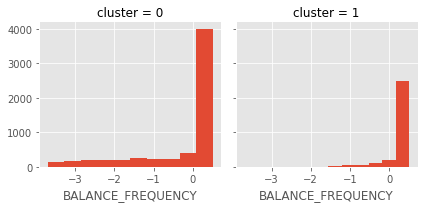

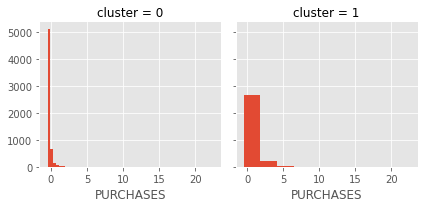

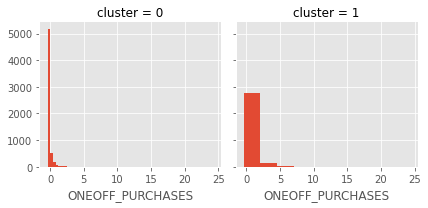

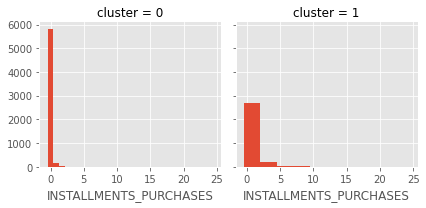

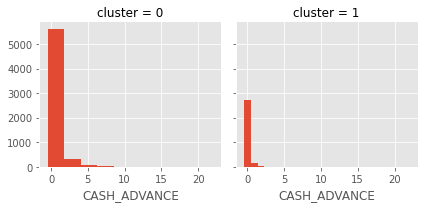

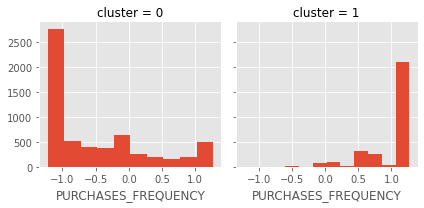

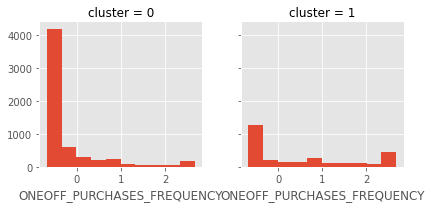

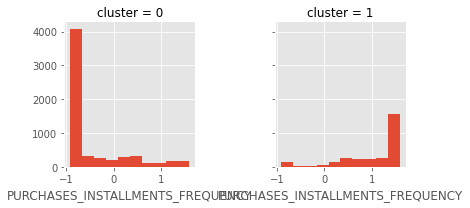

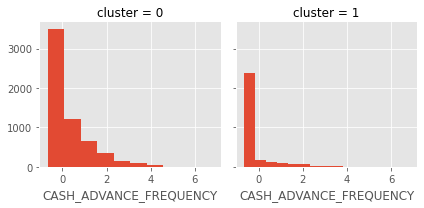

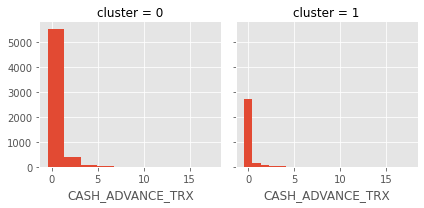

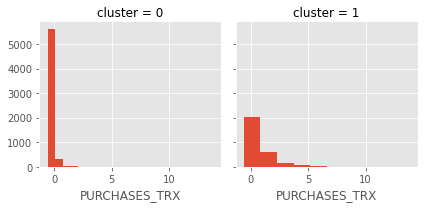

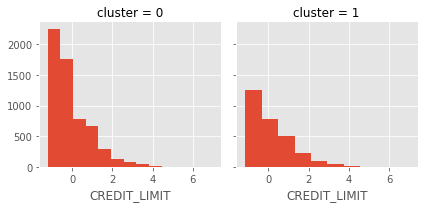

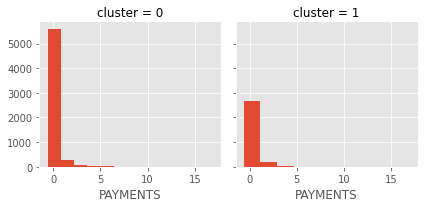

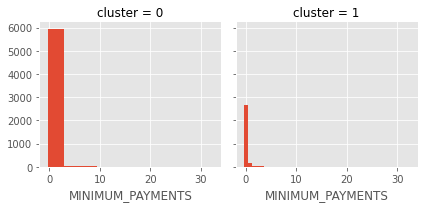

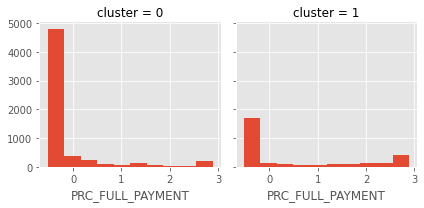

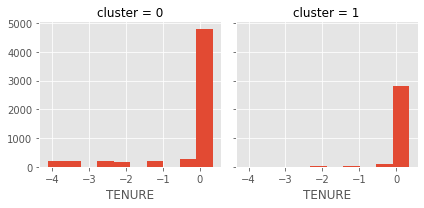

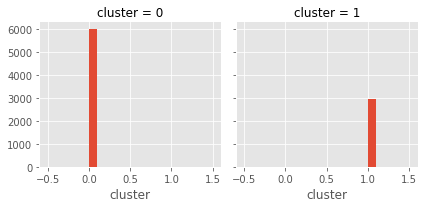

In [ ]:
for i in ward_cluster_dataset:
    grid = sns.FacetGrid(ward_cluster_dataset, col='cluster')
    grid.map(plt.hist, i)

## PCA

In [ ]:
# dekomposisi PCA
dist = 1 - cosine_similarity(new_df_scaled)
pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)

### PCA Single Link

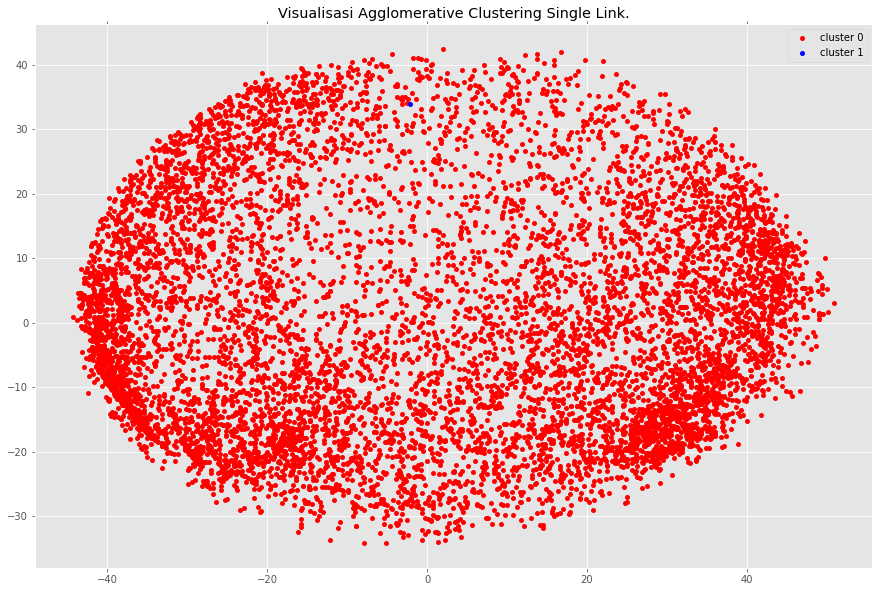

In [ ]:
# visualisasi penyebaran agglomerative clustering
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'red', 1: 'blue', 2:'green'}
label_pca = {0: 'cluster 0', 1: 'cluster 1', 2:'cluster 2'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels_single}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi Agglomerative Clustering Single Link.")
plt.show()

### PCA Complete Link

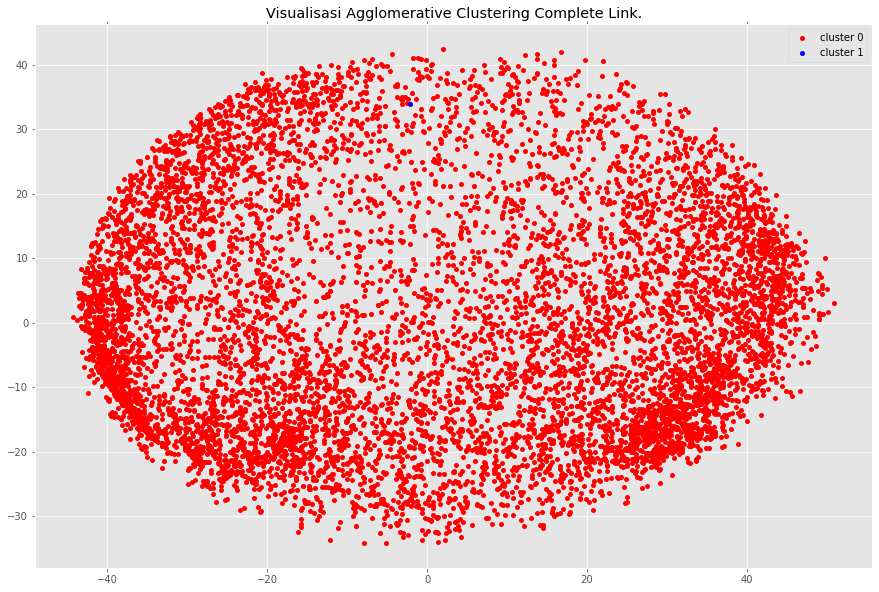

In [ ]:
# visualisasi penyebaran agglomerative clustering
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'red', 1: 'blue'}
label_pca = {0: 'cluster 0', 1: 'cluster 1'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels_complete}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi Agglomerative Clustering Complete Link.")
plt.show()

### PCA Average Link

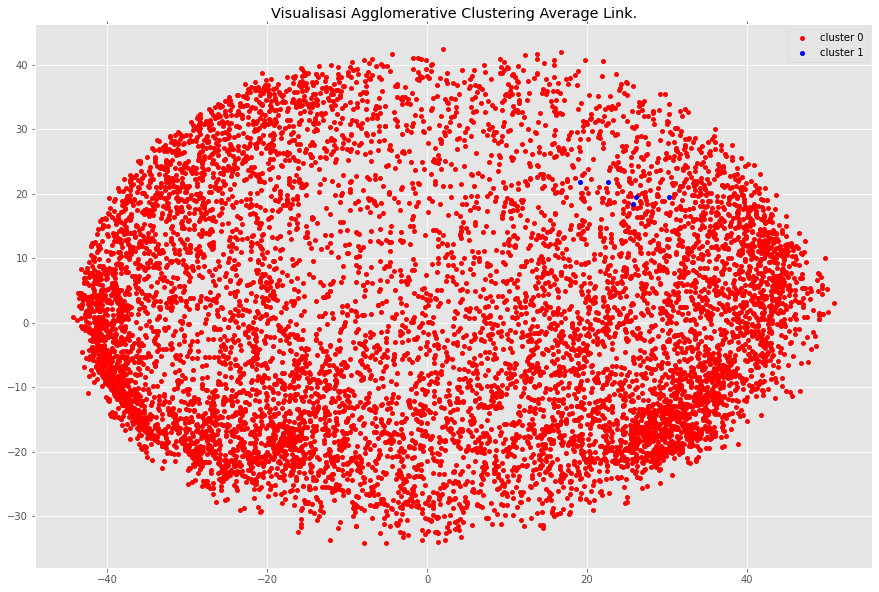

In [ ]:
# visualisasi penyebaran agglomerative clustering
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'red', 1: 'blue'}
label_pca = {0: 'cluster 0', 1: 'cluster 1'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels_average}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi Agglomerative Clustering Average Link.")
plt.show()

### PCA Ward Link

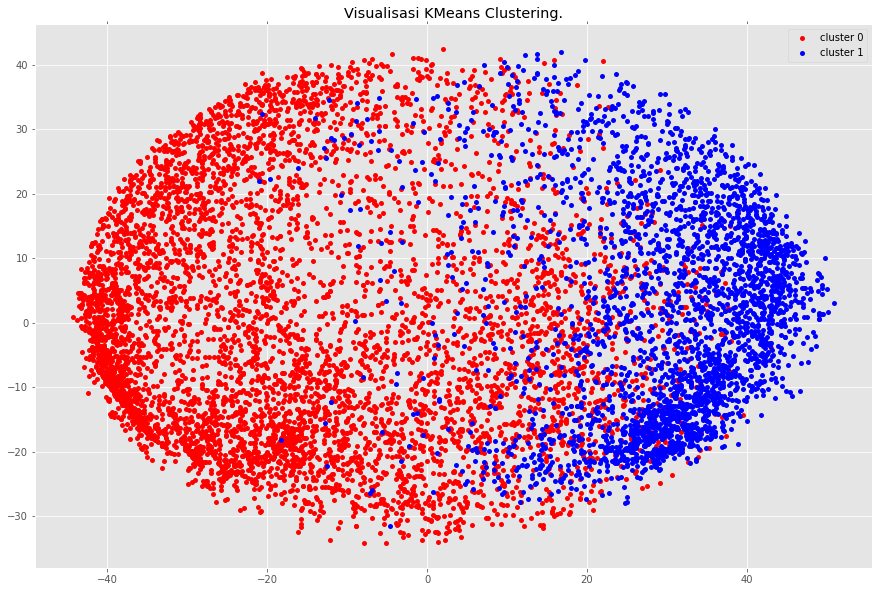

In [ ]:
# visualisasi penyebaran agglomerative clustering
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'red', 1: 'blue'}
label_pca = {0: 'cluster 0', 1: 'cluster 1'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels_ward}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi KMeans Clustering.")
plt.show()

### PCA KMeans

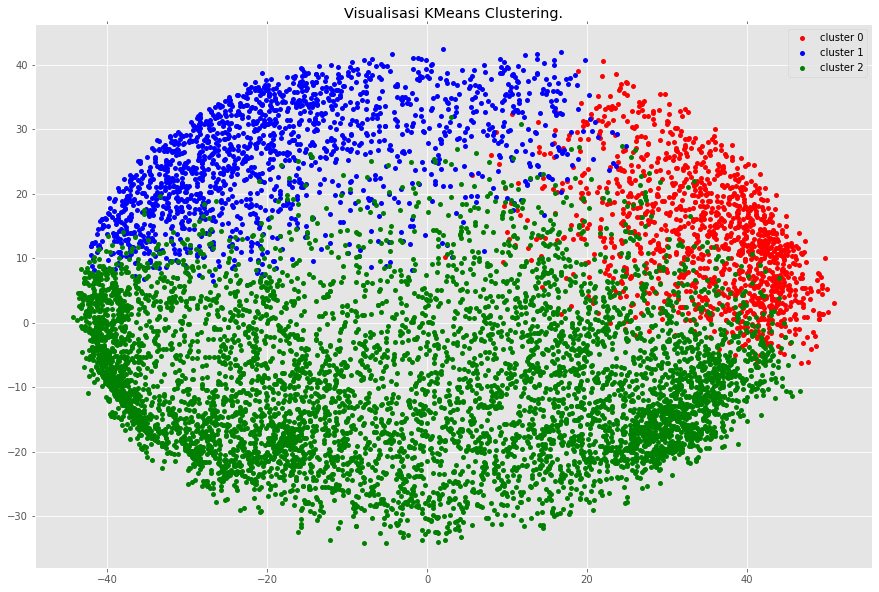

In [ ]:
# visualisasi penyebaran agglomerative clustering
x, y = pca[:, 0], pca[:, 1]
warna = {0: 'red', 1: 'blue', 2: 'green'}
label_pca = {0: 'cluster 0', 1: 'cluster 1', 2: 'cluster 2'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels_kmeans}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi KMeans Clustering.")
plt.show()

In [ ]:
set(labels_kmeans)

{0, 1, 2}

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.95, min_samples=17)
dbscan.fit(new_df_scaled)

DBSCAN(eps=0.95, min_samples=17)

In [ ]:
labels_dbscan = dbscan.labels_
cluster_dbscan = pd.DataFrame({'cluster':labels_dbscan})
dbscan_cluster_dataset = pd.concat([new_df_scaled,cluster_dbscan], axis=1)
dbscan_cluster_dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541,-1
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541,-1
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919,-1
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919,-1
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919,-1
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.346930,0.329128,-4.126919,-1


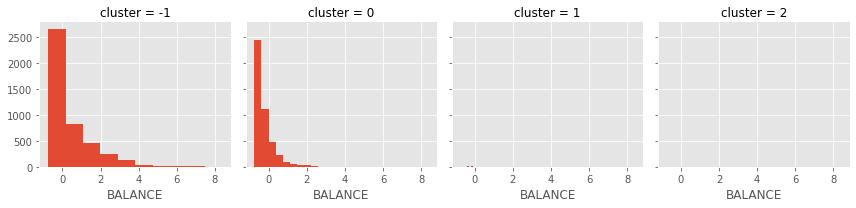

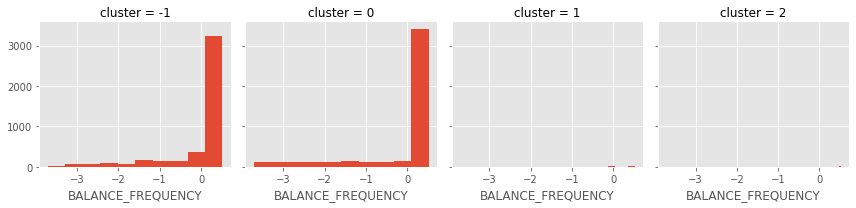

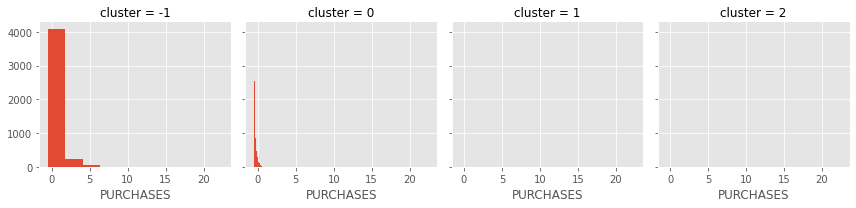

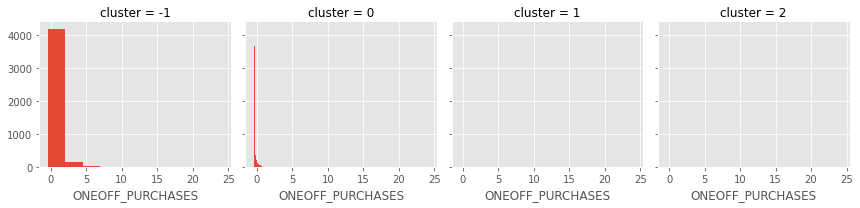

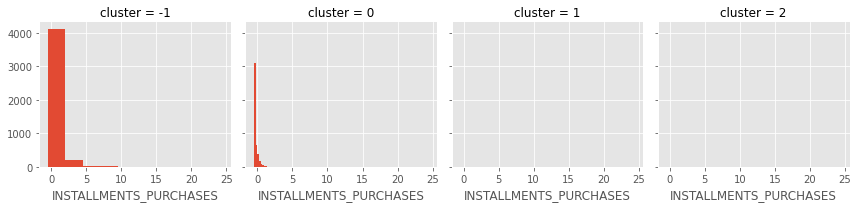

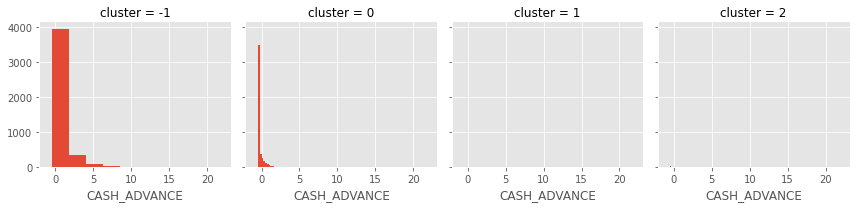

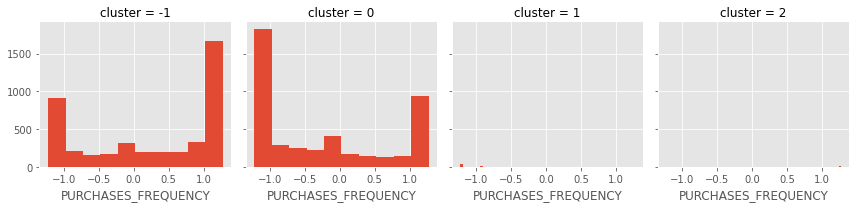

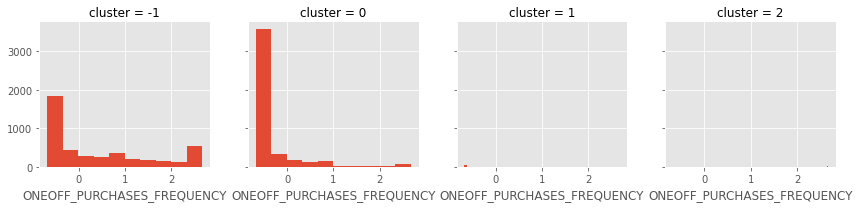

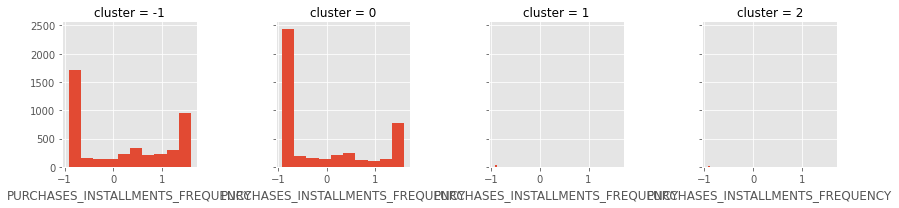

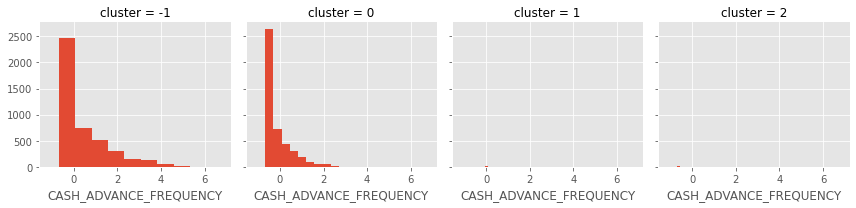

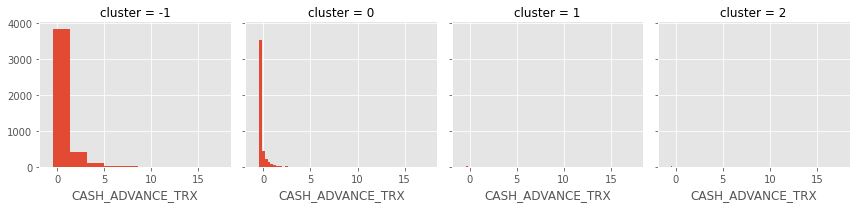

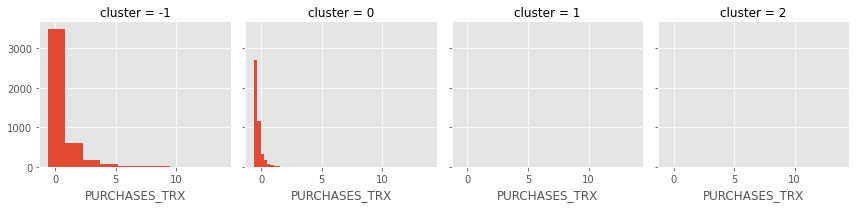

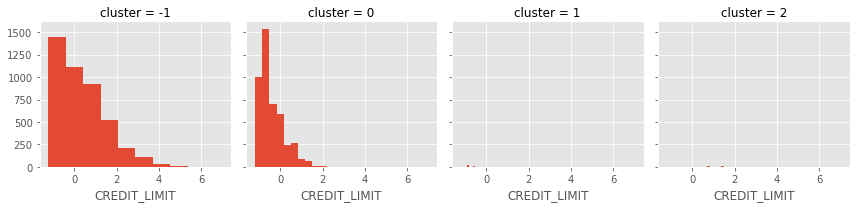

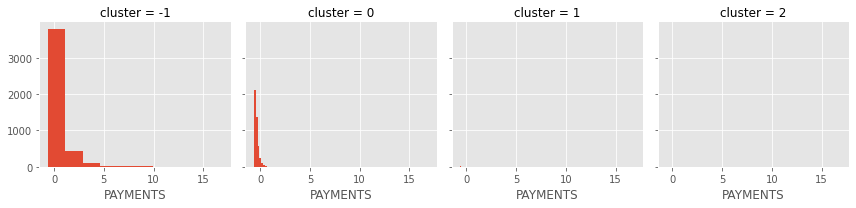

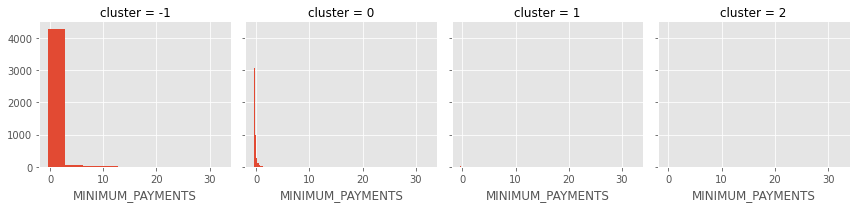

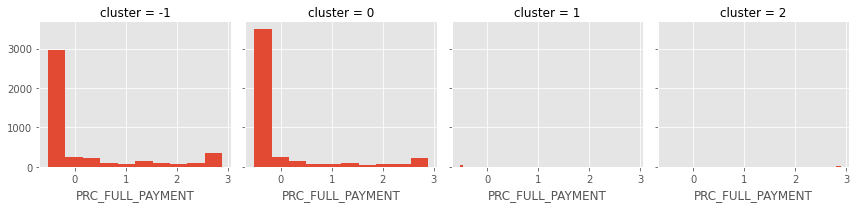

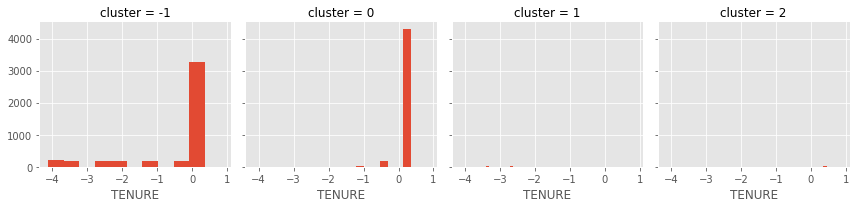

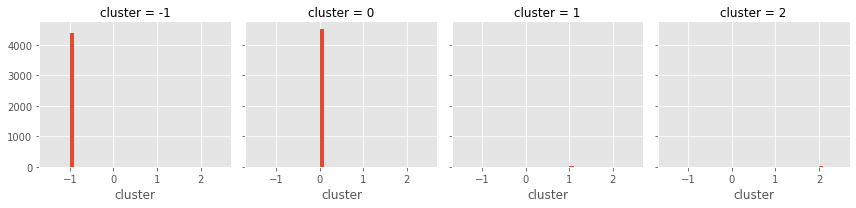

In [ ]:
for i in dbscan_cluster_dataset:
    grid = sns.FacetGrid(dbscan_cluster_dataset, col='cluster')
    grid.map(plt.hist, i)

In [ ]:
labels_dbscan = dbscan.labels_
set(labels_dbscan)

{-1, 0, 1, 2}

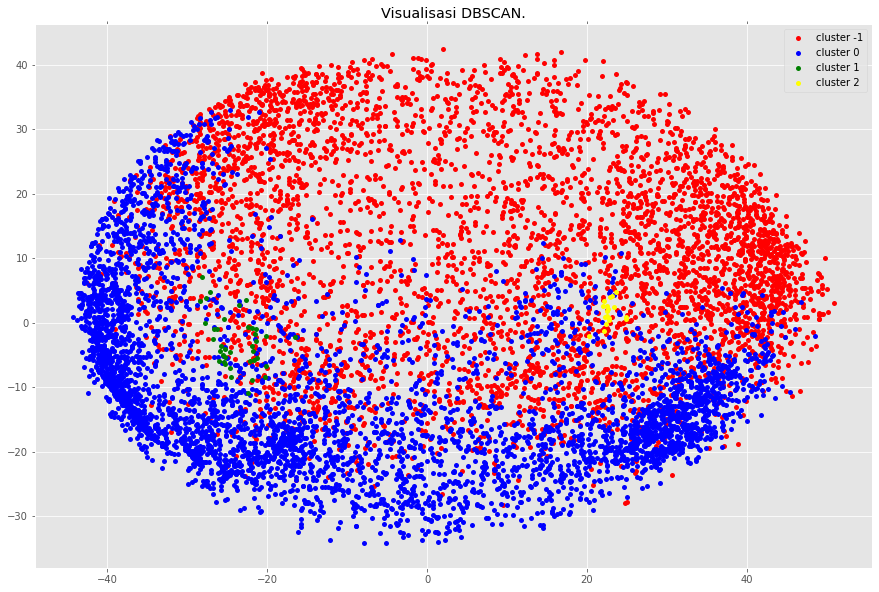

In [ ]:
# visualisasi penyebaran agglomerative clustering
x, y = pca[:, 0], pca[:, 1]
warna = {-1: 'red', 0: 'blue', 1: 'green', 2:'yellow', 3:'cyan'}
label_pca = {-1: 'cluster -1', 0: 'cluster 0', 1: 'cluster 1', 2:'cluster 2', 3:'cluster 3'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels_dbscan}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Visualisasi DBSCAN.")
plt.show()

# Evaluasi Model

## K-Means

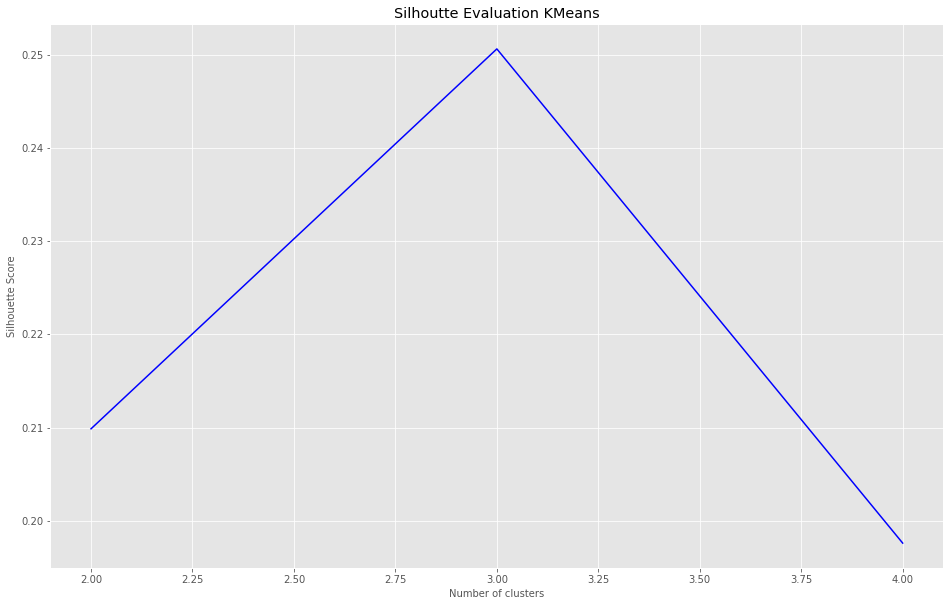

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_kmeans, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation KMeans")
plt.show() 

## Complete Link

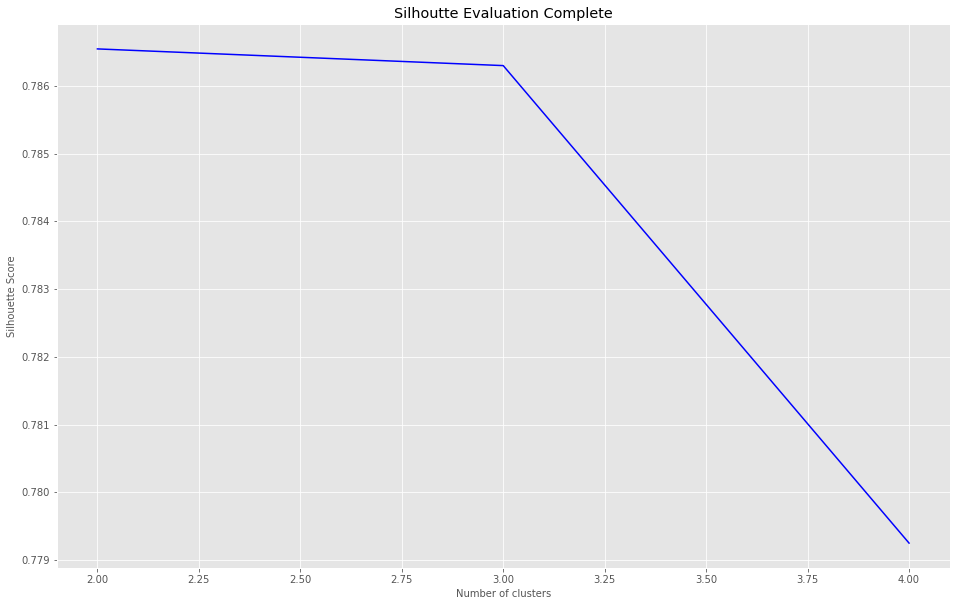

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_complete, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation Complete")
plt.show() 

## Single Link

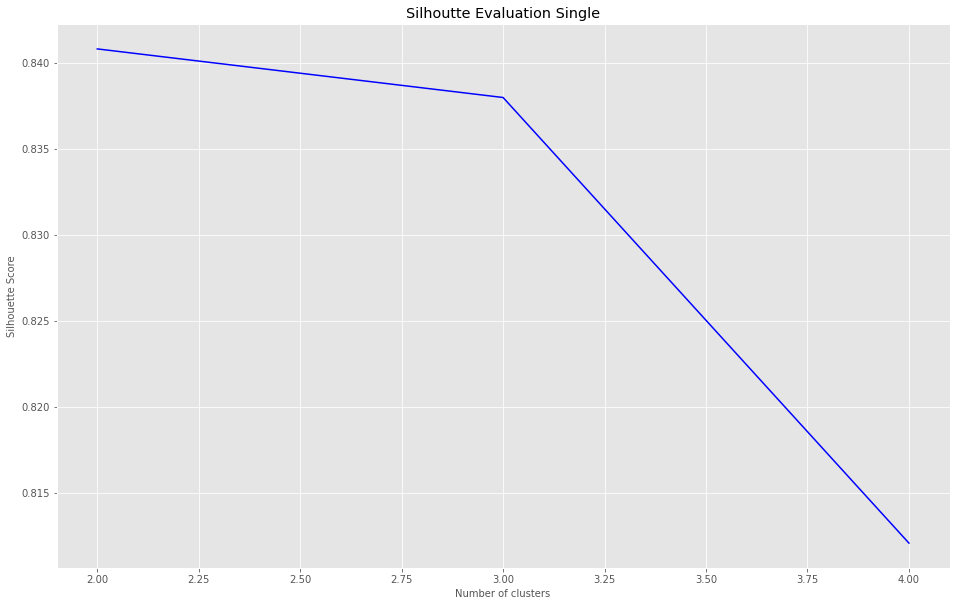

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_single, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation Single")
plt.show() 

## Average Link

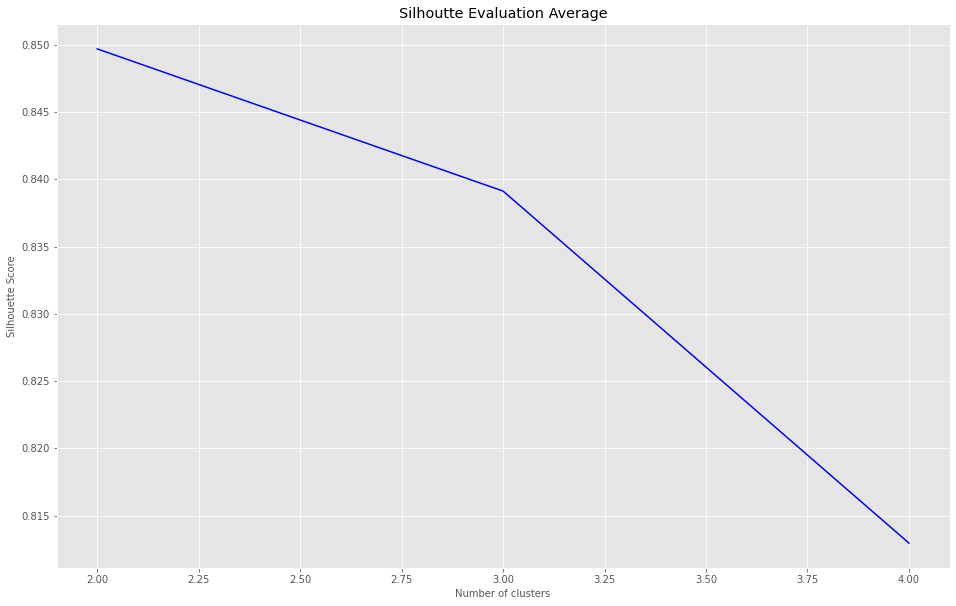

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_average, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation Average")
plt.show() 

## Ward Link

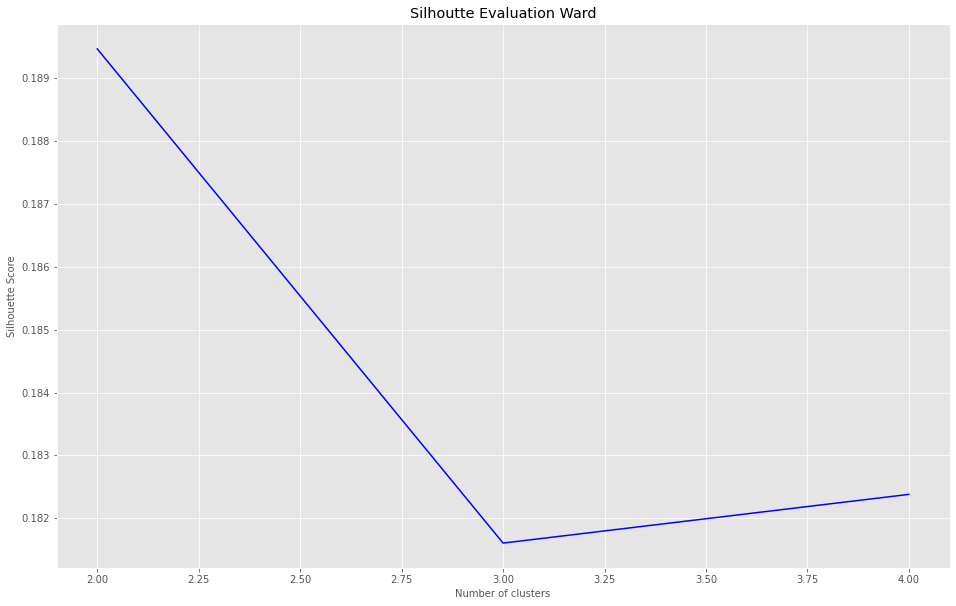

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(range(2,5), metrics_score_ward, linewidth =1.5, color = "blue") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title("Silhoutte Evaluation Ward")
plt.show() 

# Model Inference

In [ ]:
new_df_scaled.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

In [ ]:
BALANCE = float(input("BALANCE: "))
BALANCE_FREQUENCY = float(input("BALANCE_FREQUENCY: "))
PURCHASES = float(input("PURCHASES: "))
ONEOFF_PURCHASES = float(input("ONEOFF_PURCHASES: "))
INSTALLMENTS_PURCHASES = float(input("INSTALLMENTS_PURCHASES: "))
CASH_ADVANCE = float(input("CASH_ADVANCE: "))
PURCHASES_FREQUENCY = float(input("PURCHASES_FREQUENCY: "))
ONEOFF_PURCHASES_FREQUENCY = float(input("ONEOFF_PURCHASES_FREQUENCY: "))
PURCHASES_INSTALLMENTS_FREQUENCY = float(input("PURCHASES_INSTALLMENTS_FREQUENCY: "))
CASH_ADVANCE_FREQUENCY = float(input("CASH_ADVANCE_FREQUENCY: "))
CASH_ADVANCE_TRX = float(input("CASH_ADVANCE_TRX: "))
PURCHASES_TRX = float(input("PURCHASES_TRX: "))
CREDIT_LIMIT = float(input("CREDIT_LIMIT: "))
PAYMENTS = float(input("PAYMENTS: "))
MINIMUM_PAYMENTS = float(input("MINIMUM_PAYMENTS: "))
PRC_FULL_PAYMENT = float(input("PRC_FULL_PAYMENT: "))
TENURE = float(input("TENURE: "))

feature = [
    BALANCE,
    BALANCE_FREQUENCY,
    PURCHASES,
    ONEOFF_PURCHASES,
    INSTALLMENTS_PURCHASES,
    CASH_ADVANCE,
    PURCHASES_FREQUENCY,
    ONEOFF_PURCHASES_FREQUENCY,
    PURCHASES_INSTALLMENTS_FREQUENCY,
    CASH_ADVANCE_FREQUENCY,
    CASH_ADVANCE_TRX,
    PURCHASES_TRX,
    CREDIT_LIMIT,
    PAYMENTS,
    MINIMUM_PAYMENTS,
    PRC_FULL_PAYMENT,
    TENURE
]

feature = scaler.fit_transform([feature])
predict = kmeans.predict(feature)

print("Cluster : ",predict)

BALANCE: 50.390
BALANCE_FREQUENCY: 0.565656
PURCHASES: 80.4
ONEOFF_PURCHASES: 0.0
INSTALLMENTS_PURCHASES: 80.4
CASH_ADVANCE: 0.0
PURCHASES_FREQUENCY: 0.3
ONEOFF_PURCHASES_FREQUENCY: 0.0
PURCHASES_INSTALLMENTS_FREQUENCY: 0.0833
CASH_ADVANCE_FREQUENCY: 0.0
CASH_ADVANCE_TRX: 0.0
PURCHASES_TRX: 3.0
CREDIT_LIMIT: 500.0
PAYMENTS: 200.8322
MINIMUM_PAYMENTS: 140.0
PRC_FULL_PAYMENT: 0.0
TENURE: 12
Cluster :  [1]


## KMeans Model

In [ ]:
pickle.dump(kmeans, open('kmeans.pkl','wb'))

## Hierarchy Model

In [ ]:
pickle.dump(agglo_ward, open('ward.pkl','wb'))

## DBSCAN Model

In [ ]:
pickle.dump(dbscan, open('dbscan.pkl','wb'))

# Kesimpulan

Dari dataset yang telah diolah, dapat disimpulkan bahwa terdapat 3 kluster berbeda yang mana menunjukkan

* kluster-1 : Orang-orang yang tidak hedon
* kluster-2 : Orang-orang yang sedikit hedon
* kluster-3 : Orang-orang yang terlalu hedon